In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="white")

## Mapping depth

In [2]:
df = pd.read_csv("../data/average_depth.csv").sort_values(by="AverageDepth").reset_index()
medX = int(len(df)/2)
minimum = df.at[0, "AverageDepth"]
median = df.at[int(len(df)/2), "AverageDepth"]
maximum = df.at[len(df)-1, "AverageDepth"]
print(median)
df["sample_id"] = df["Sample"].apply(lambda x: x.split("_")[0])
df.head()

168.539


,index,Sample,AverageDepth,sample_id
0,140,1327_L003_f,0.000548,1327
1,857,5991_L003_f,3.793590,5991
2,0,10021_L003_f,3.851770,10021
3,565,2478_L003_f,7.150010,2478
4,4,10135_L003_f,9.375330,10135


(0.0, 1120.0)

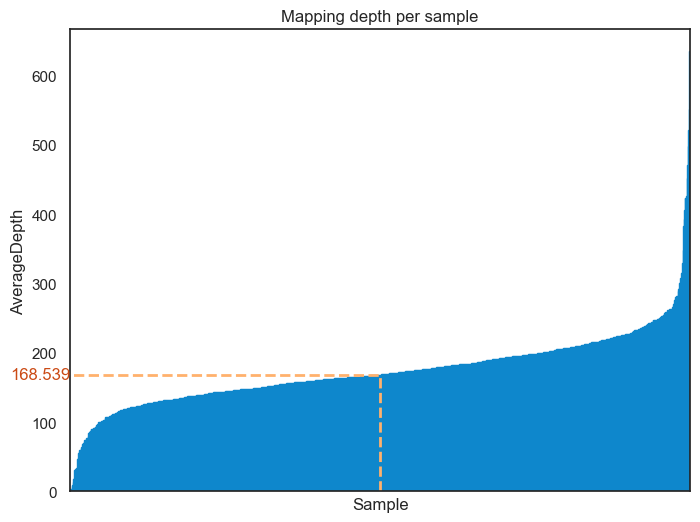

In [3]:
myOrange = "#cb4b16"

fig, ax = plt.subplots(1,1,figsize=(8,6))
sns.barplot(df, x="Sample", y="AverageDepth", ax=ax, align="edge", width=1, edgecolor="xkcd:water blue")
ax.plot([medX, medX, 0], [0, median, median], color="xkcd:apricot", zorder=1, lw=2, ls="--")
ax.text(x=0, y=median, s=f"{median}", ha="right", va="center", color=myOrange)

ax.set_title("Mapping depth per sample")
plt.tick_params(axis='x', labelbottom=False)
ax.set_xlim(0,len(df))

In [4]:
sub50 = set([])
for index, row in df.iterrows():
    if row["AverageDepth"]<50:
        sub50.add(row["Sample"].split("_f")[0])
print(sub50)
print(f"Number of samples with mapping depth below 50: {len(sub50)}")

{'10950_L004', '10135_L003', '21782_L004', '2478_L003', '22057_L004', '3208_L004', '1327_L003', '9820_L004', '13604_L003', '12348_L004', '10021_L003', '5991_L003', '9146_L004', '16379_L003', '1902_L004'}
Number of samples with mapping depth below 50: 15


Only 15 samples mapped to below an average depth of 15 reads

## Flagstat

In [5]:
df1 = pd.read_csv("../data/all_flagstat.csv")
df1["total_reads"] = df1["in_total_passed"] + df1["in_total_failed"]
df1["%mapped"] = df1["mapped_passed"] / df1["total_reads"]
df1 = df1.sort_values(by="total_reads").reset_index()
df1["sample_id"] = df1["sample"].apply(lambda x: x.split("_")[0])
df1.head()

,index,sample,in_total_passed,in_total_failed,primary_passed,primary_failed,secondary_passed,secondary_failed,supplementary_passed,supplementary_failed,...,properly_paired_failed,with_itself_and_mate_mapped_passed,with_itself_and_mate_mapped_failed,singletons_passed,singletons_failed,with_mate_mapped_to_a_different_chr_passed,with_mate_mapped_to_a_different_chr_failed,total_reads,%mapped,sample_id
0,140,1327_L003_flagstat.txt,16,0,16,0,0,0,0,0,...,0,16,0,0,0,0,0,16,1.000000,1327
1,104,12348_L004_flagstat.txt,927995,0,924572,0,0,0,3423,0,...,0,890146,0,15676,0,0,0,927995,0.979795,12348
2,50,10950_L004_flagstat.txt,1035205,0,1033414,0,0,0,1791,0,...,0,998226,0,16715,0,0,0,1035205,0.982155,10950
3,635,3208_L004_flagstat.txt,1143649,0,1135554,0,0,0,8095,0,...,0,982912,0,8741,0,0,0,1143649,0.874174,3208
4,1113,9820_L004_flagstat.txt,1406057,0,1398338,0,0,0,7719,0,...,0,1354116,0,19437,0,0,0,1406057,0.982373,9820


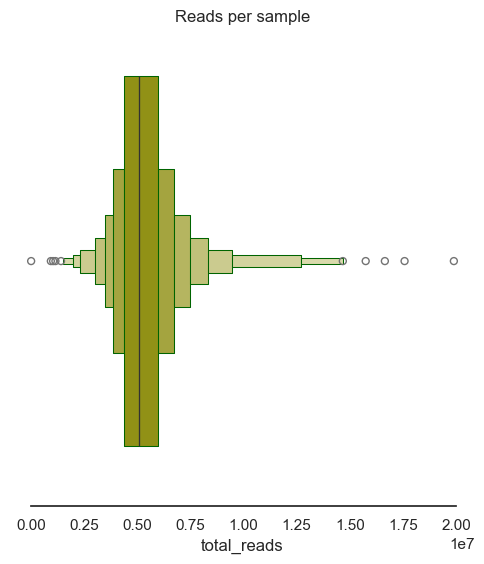

In [6]:
fig, ax = plt.subplots(1,1,figsize=(6,6), sharex=True)
reads_per_sample = sns.boxenplot(df1, x="total_reads", ax=ax, edgecolor="darkgreen", color="xkcd:puke", zorder=1)
ax.set_title("Reads per sample")
sns.despine(ax=ax, trim=True, offset=10)

`in_total_passed` refers to the number of reads that passed QC

In [7]:
df1.columns

Index(['index', 'sample', 'in_total_passed', 'in_total_failed',
       'primary_passed', 'primary_failed', 'secondary_passed',
       'secondary_failed', 'supplementary_passed', 'supplementary_failed',
       'duplicates_passed', 'duplicates_failed', 'primary_duplicates_passed',
       'primary_duplicates_failed', 'mapped_passed', 'mapped_failed',
       'primary_mapped_passed', 'primary_mapped_failed',
       'paired_in_sequencing_passed', 'paired_in_sequencing_failed',
       'read1_passed', 'read1_failed', 'read2_passed', 'read2_failed',
       'properly_paired_passed', 'properly_paired_failed',
       'with_itself_and_mate_mapped_passed',
       'with_itself_and_mate_mapped_failed', 'singletons_passed',
       'singletons_failed', 'with_mate_mapped_to_a_different_chr_passed',
       'with_mate_mapped_to_a_different_chr_failed', 'total_reads', '%mapped',
       'sample_id'],
      dtype='object')

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

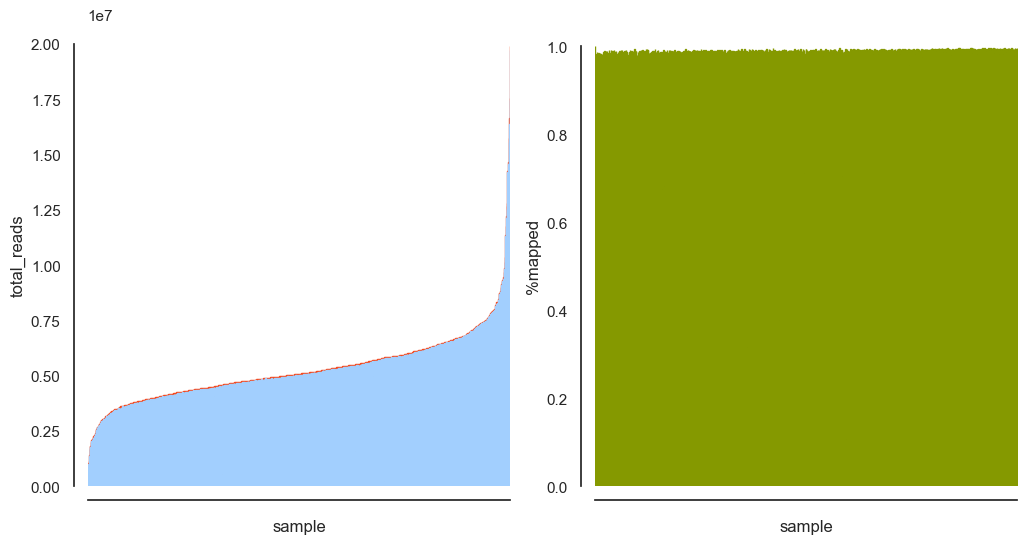

In [8]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,6), sharex=True)
failed = sns.barplot(df1, x="sample", y="total_reads", ax=ax0, align="edge", width=1, edgecolor="xkcd:reddish orange", zorder=1)
passed = sns.barplot(df1, x="sample", y="mapped_passed", ax=ax0, align="edge", width=1, edgecolor="xkcd:baby blue", zorder=2)


permapped = sns.barplot(df1, x="sample", y="%mapped", ax=ax1, align="edge", width=1, edgecolor="#859900")

sns.despine(ax=ax0, trim=True, offset=10)
sns.despine(ax=ax1, trim=True, offset=10)

ax0.set_xticklabels("")
ax1.set_xticklabels("")

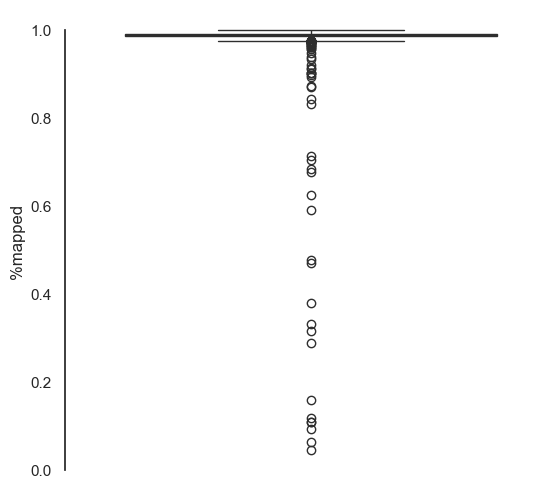

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6,6), sharex=True)
permapped = sns.boxplot(df1, y="%mapped",ax=ax,color="#859900")

sns.despine(ax=ax, trim=True, offset=10)

In [10]:
lowMapping = set([])
for index, row in df1.iterrows():
    if row["%mapped"] < .9:
        lowMapping.add(row["sample"].split("_flagstat")[0])
print(lowMapping)
print(f"Total samples below threshold: {len(lowMapping)}")

{'11604_L003', '10135_L003', '7584_L004', '7261_L003', '3208_L004', '5914_L004', '21616_L004', '10998_L004', '10221_L003', '21782_L004', '13604_L003', '9146_L004', '1902_L004', '2014-3693_L003', '22057_L004', '6029_L003', '22496_L004', '10021_L003', '5991_L003', '16379_L003', '20457_L004', '2478_L003', '2072_L004', '5937_L003', '6227_L003'}
Total samples below threshold: 25


In [11]:
allBad = sub50.union(lowMapping)
realBad = sub50.intersection(lowMapping)

print(f"The full set of {len(allBad)} bad samples: {allBad}")
print(f"The full set of {len(realBad)} really bad samples: {realBad}")

The full set of 29 bad samples: {'11604_L003', '10950_L004', '10135_L003', '7584_L004', '7261_L003', '3208_L004', '9820_L004', '5914_L004', '21616_L004', '10998_L004', '10221_L003', '21782_L004', '1327_L003', '13604_L003', '12348_L004', '9146_L004', '1902_L004', '2014-3693_L003', '22057_L004', '6029_L003', '22496_L004', '10021_L003', '5991_L003', '16379_L003', '20457_L004', '2478_L003', '2072_L004', '5937_L003', '6227_L003'}
The full set of 11 really bad samples: {'21782_L004', '10135_L003', '2478_L003', '22057_L004', '3208_L004', '13604_L003', '10021_L003', '5991_L003', '9146_L004', '16379_L003', '1902_L004'}


In [12]:
goodFname = "../data/good_samples.txt"
# questionableFname = "../data/questionable_samples.txt"
badFname = "../data/bad_samples.txt"

with open(goodFname, "w") as o:
    for index, row in df1.iterrows():
        s = row["sample"].split("_flag")[0]
        if s not in allBad:
            o.write(f"{s}\n")

with open(badFname, "w") as o:
    for s in allBad:
        o.write(f"{s}\n")

[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

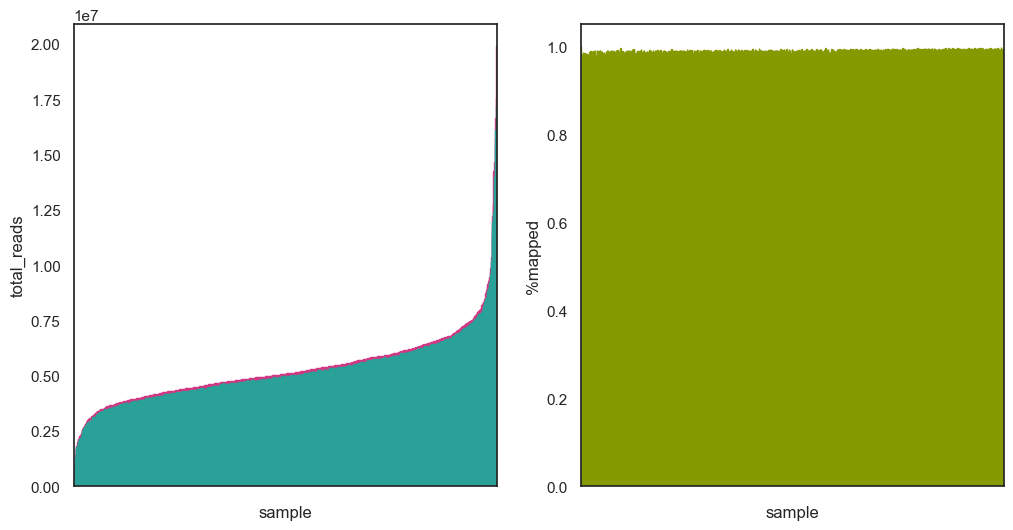

In [13]:
fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,6), sharex=True)
failed = sns.barplot(df1, x="sample", y="total_reads", ax=ax0, align="edge", width=1, edgecolor="#d33682", zorder=1)
passed = sns.barplot(df1, x="sample", y="properly_paired_passed", ax=ax0, align="edge", width=1, edgecolor="#2aa198", zorder=2)


permapped = sns.barplot(df1, x="sample", y="%mapped", ax=ax1, align="edge", width=1, edgecolor="#859900")

ax0.set_xticklabels("")

In [14]:
dfa = df.set_index("sample_id")
dfb = df1.set_index("sample_id")
dfnu = dfa.merge(dfb)
dfnu["sampleID"] = dfnu["Sample"].apply(lambda x: x.split("_")[0])
dfnu = dfnu[["sampleID", "AverageDepth", "%mapped"]].copy()
dfnu.to_csv("../data/per_sample_depth_and_mapping.csv")